In [2]:
import os
os.chdir('../')

In [3]:
%pwd

'e:\\Assignment\\workplete'

In [5]:
from utils import read_yaml
from pathlib import Path
params = read_yaml(Path("params.yaml"))
params.data_path

'data/your_data_file.csv'

In [7]:
import pandas as pd
df = pd.read_excel('artifacts\olympics2024.xlsx')
df['Gold'].isnull().any()

np.True_

# Data Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv('artifacts\olympics2024.csv')

In [6]:
df.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [5]:
df.shape

(91, 7)

## Top N countries ranked by number of gold

In [38]:
def ranking_by_gold(df,n):
    temp = df.sort_values(by="Gold", ascending=False)[["Country", "Gold"]][:n]
    plt.figure(figsize=(10,8))
    sns.barplot(x=temp["Country"], y=temp['Gold'])
    plt.title(f"Top {n} Countries by Gold")
    plt.xticks(rotation=30)
    plt.savefig('gold_medal_count.jpg')
    plt.show()

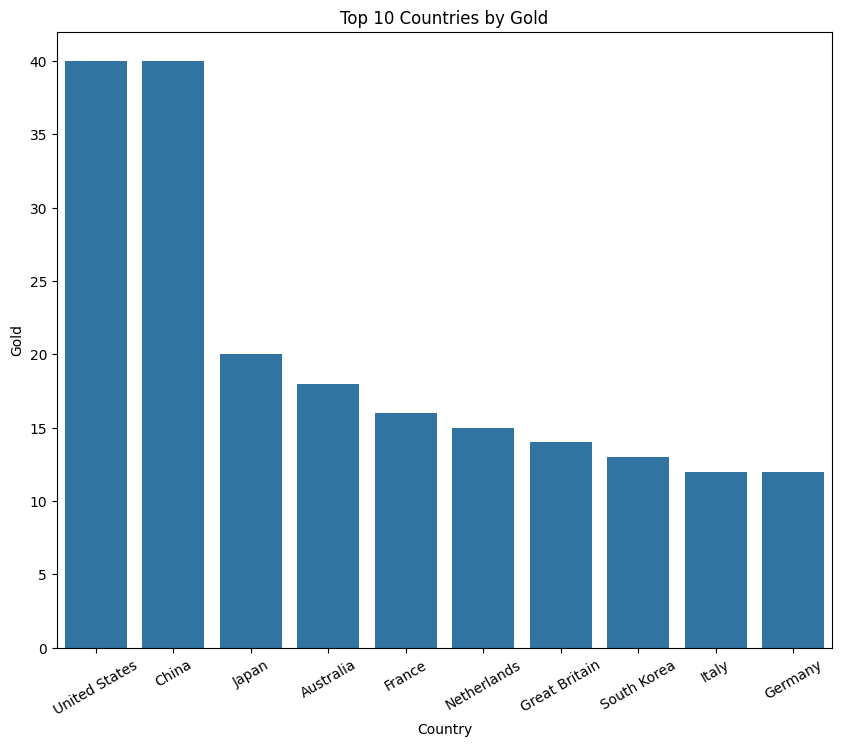

In [39]:
ranking_by_gold(df,10)

In [52]:
from ydata_profiling import ProfileReport


In [56]:
profile = ProfileReport(df, title='Olympics', explorative=True)

In [57]:
profile.to_file("ProfileReport.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
lis = ["hi", "hello", "wtf", "let's", "go"]
user_input = input()
selected_pairs = [tuple(map(int, pair.split())) for pair in user_input.split()]

In [18]:
selected_pairs

[(1,), (2,), (3,), (5,), (4,)]

In [19]:
pairs = [(lis[idx1 - 1], lis[idx2 - 1]) for idx1, idx2 in selected_pairs]
pairs

ValueError: not enough values to unpack (expected 2, got 1)

In [20]:
df.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [1]:
import matplotlib.pyplot as plt

In [ ]:
statistics = {"overall":{"missing": 23,
                         "missing_percent": 23}}
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:

    missing_values = df[column].isnull().sum()
    missing_values_percentage = (missing_values / len(df[column])) * 100

    distinct_values = df[column].nunique()
    distinct_values_percentage = (distinct_values / len(df[column])) * 100

    statistics[column] = {"missing_values": missing_values,
                            "missing_values_percentage" : round(missing_values_percentage,2),
                            "distinct_values": distinct_values,
                            "distinct_values_percentage": round(distinct_values_percentage,2)}

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column])
    plt.title(f"Distribution of {column}")
    plt.show()

In [15]:
data = df.describe()

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [27]:
def encode_features(df):
    categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
    numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

    cat_cols_label = [col for col in categorical_cols if df[col].nunique() > 5]
    cat_cols_ohe = [col for col in categorical_cols if df[col].nunique() <= 5]

    for col in cat_cols_label:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

    df = pd.get_dummies(df, columns=cat_cols_ohe, dtype=int)
    return df

In [28]:
ddf = encode_features(df)

In [29]:
ddf

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,88,88,40,44,42,126
1,2,15,14,40,27,24,91
2,3,46,47,20,12,13,45
3,4,4,4,18,19,16,53
4,5,29,30,16,26,22,64
...,...,...,...,...,...,...,...
86,84,64,64,0,0,1,1
87,84,69,71,0,0,1,1
88,84,73,75,0,0,1,1
89,84,74,78,0,0,1,1


In [30]:
from utils import *
params = read_yaml(PARAMS_FILE_PATH)
subdir_path = os.path.join(params.save_plots, "bivariate")
subdir_path

'data_analysis/analysis_plots\\bivariate'

In [31]:
if not os.path.exists(subdir_path):
    os.makedirs(subdir_path)

In [32]:
shape = df.shape
shape

(91, 7)

In [33]:
summary = {'statistics':{"overall": {"shape": (9,7)}, "missing_values":23}}
summary

{'statistics': {'overall': {'shape': (9, 7)}, 'missing_values': 23}}

In [34]:
summary['statistics']['overall']['shape']

(9, 7)

In [35]:
data = df.describe().to_dict()

In [40]:
data['Rank']

{'count': 91.0,
 'mean': 45.30769230769231,
 'std': 25.65224369987169,
 'min': 1.0,
 '25%': 23.5,
 '50%': 44.0,
 '75%': 68.0,
 'max': 84.0}

In [41]:
df.describe()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
count,91.000000,91.00000,91.00000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,45.00000,45.00000,3.604396,3.593407,4.219780,11.417582
std,25.652244,26.41338,26.41338,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.00000,0.00000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,22.50000,22.50000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,45.00000,45.00000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,67.50000,67.50000,3.000000,3.000000,5.000000,9.000000
max,84.000000,90.00000,90.00000,40.000000,44.000000,42.000000,126.000000


In [42]:
df

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,88,88,40,44,42,126
1,2,15,14,40,27,24,91
2,3,46,47,20,12,13,45
3,4,4,4,18,19,16,53
4,5,29,30,16,26,22,64
...,...,...,...,...,...,...,...
86,84,64,64,0,0,1,1
87,84,69,71,0,0,1,1
88,84,73,75,0,0,1,1
89,84,74,78,0,0,1,1


In [50]:
path = "data_analysis/analysis_plots/bivariate"
for file in os.listdir(path):    
    filename = str(file).split('.')[0]
    filepath = os.path.join(path, file)
    print(f'{filename}: {filepath}')

Bronze_vs_Total: data_analysis/analysis_plots/bivariate\Bronze_vs_Total.png
Gold_vs_Bronze: data_analysis/analysis_plots/bivariate\Gold_vs_Bronze.png
Gold_vs_Silver: data_analysis/analysis_plots/bivariate\Gold_vs_Silver.png
Gold_vs_Total: data_analysis/analysis_plots/bivariate\Gold_vs_Total.png
Rank_vs_Bronze: data_analysis/analysis_plots/bivariate\Rank_vs_Bronze.png
Rank_vs_Gold: data_analysis/analysis_plots/bivariate\Rank_vs_Gold.png
Rank_vs_Silver: data_analysis/analysis_plots/bivariate\Rank_vs_Silver.png
Rank_vs_Total: data_analysis/analysis_plots/bivariate\Rank_vs_Total.png
Silver_vs_Bronze: data_analysis/analysis_plots/bivariate\Silver_vs_Bronze.png
Silver_vs_Total: data_analysis/analysis_plots/bivariate\Silver_vs_Total.png


In [58]:
dictionary = {'Statistics': {'overall': {'shape': (91, 7), 'missing_values': 0, 'missing_values_percentage': 0.0, 'duplicate_rows': 0, 'duplicate_rows_percentage': 0.0}, 'Rank': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 63, 'distinct_values_percentage': 69.23}, 'Country': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 91, 'distinct_values_percentage': 100.0}, 'Country Code': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 91, 'distinct_values_percentage': 100.0}, 'Gold': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 18, 'distinct_values_percentage': 19.78}, 'Silver': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 16, 'distinct_values_percentage': 17.58}, 'Bronze': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 19, 'distinct_values_percentage': 20.88}, 'Total': {'missing_values': 0, 'missing_values_percentage': 0.0, 'distinct_values': 27, 'distinct_values_percentage': 29.67}}, 'Description': {'Rank': {'count': 91.0, 'mean': 45.30769230769231, 'std': 25.65224369987169, 'min': 1.0, '25%': 23.5, '50%': 44.0, '75%': 68.0, 'max': 84.0}, 'Gold': {'count': 91.0, 'mean': 3.6043956043956045, 'std': 6.990277567019815, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 3.0, 'max': 40.0}, 'Silver': {'count': 91.0, 'mean': 3.5934065934065935, 'std': 6.770816497584028, 'min': 0.0, '25%': 0.0, '50%': 1.0, '75%': 3.0, 'max': 44.0}, 'Bronze': {'count': 91.0, 'mean': 4.21978021978022, 'std': 6.55879765031874, 'min': 0.0, '25%': 1.0, '50%': 2.0, 
'75%': 5.0, 'max': 42.0}, 'Total': {'count': 91.0, 'mean': 11.417582417582418, 'std': 19.702828862918775, 'min': 1.0, '25%': 2.0, '50%': 5.0, '75%': 9.0, 'max': 126.0}}, 'Trends': {'Rank': 'Upward trend', 'Gold': 'Downward trend', 'Silver': 'Downward trend', 'Bronze': 'Downward trend', 'Total': 'Downward trend'}}

In [60]:
import json

with open('data.json', 'w') as json_file:
    json.dump(dictionary, json_file, indent=4)

In [ ]:
import re

# Define intent categories and their corresponding keywords
intent_categories = {
    "book_flight": ["book", "flight", "travel"],
    "check_weather": ["weather", "forecast", "temperature"],
    "make_reservation": ["reservation", "restaurant", "table"]
}

# Define regular expressions for each intent category
intent_regex = {
    "book_flight": r"book a flight to (.*)",
    "check_weather": r"what's the weather like in (.*)",
    "make_reservation": r"make a reservation at (.*)"
}

def classify_intent(query):
    # Tokenize the query
    tokens = query.split()

    # Check for keyword matches
    for intent, keywords in intent_categories.items():
        for keyword in keywords:
            if keyword in tokens:
                return intent

    # Check for regular expression matches
    for intent, regex in intent_regex.items():
        match = re.match(regex, query)
        if match:
            return intent

    # If no match is found, return a default intent
    return "unknown"

# Test the function
query = "book a flight to New York"
intent = classify_intent(query)
print("Intent:", intent)

In [1]:
def check_task_type(target_series):
    """
    Check whether the task is classification or regression based on the target column.

    Parameters:
    target_column (str): Name of the target column

    Returns:
    str: "classification" or "regression"
    """
    
    # Check if the target column is categorical (i.e., classification)
    if target_series.dtype == 'object' or target_series.nunique() < 10:
        return "classification"
    
    # Check if the target column is numerical (i.e., regression)
    elif target_series.dtype.kind in ['i', 'f']:
        return "regression"
    
    else:
        print("Unable to determine task type.")
        task = input("Please enter task type (e.g, regression, classification): ")
        if task.lower() == 'regression':
            return "regression"
        elif task.lower() == 'classification':
            return "classification"
        else:
            raise ValueError("Unable to determine task type. Please check the input.")


In [8]:
import os 
os.chdir('../')

In [3]:
import pandas as pd
from utils import *
params = read_yaml(PARAMS_FILE_PATH)
df = pd.read_csv(params.data_path)
target = df['Stage']
task = check_task_type(target)
task

'classification'

In [6]:
string = 'ani.mal.png'
string.removesuffix('.png')

'ani.mal'

In [7]:
for file in os.listdir(params.bivariate):
    filename = str(file).split('.png')[0]
    filepath = os.path.join(params.bivariate, file)
    print(f'{filename}:{filepath}')

Attack_vs_Defense:data_analysis/analysis_plots/bivariate\Attack_vs_Defense.png
Bronze_vs_Total:data_analysis/analysis_plots/bivariate\Bronze_vs_Total.png
Gold_vs_Bronze:data_analysis/analysis_plots/bivariate\Gold_vs_Bronze.png
Gold_vs_Silver:data_analysis/analysis_plots/bivariate\Gold_vs_Silver.png
Gold_vs_Total:data_analysis/analysis_plots/bivariate\Gold_vs_Total.png
HP_vs_Attack:data_analysis/analysis_plots/bivariate\HP_vs_Attack.png
HP_vs_Defense:data_analysis/analysis_plots/bivariate\HP_vs_Defense.png
Rank_vs_Bronze:data_analysis/analysis_plots/bivariate\Rank_vs_Bronze.png
Rank_vs_Gold:data_analysis/analysis_plots/bivariate\Rank_vs_Gold.png
Rank_vs_Silver:data_analysis/analysis_plots/bivariate\Rank_vs_Silver.png
Rank_vs_Total:data_analysis/analysis_plots/bivariate\Rank_vs_Total.png
Silver_vs_Bronze:data_analysis/analysis_plots/bivariate\Silver_vs_Bronze.png
Silver_vs_Total:data_analysis/analysis_plots/bivariate\Silver_vs_Total.png


In [ ]:
from IPython.display import Image, display
for cols in df.columns:
    path = os.path.join(params.distribution, f'{cols}.png')
    display(Image(path))

In [ ]:
from IPython.display import Image
Image('data_analysis/analysis_plots/distribution\Sp. Atk.png')

In [11]:
import matplotlib.pyplot as plt
import urllib
import os
from utils import *
params = read_yaml(PARAMS_FILE_PATH)

In [12]:
for file in os.listdir(params.trends):
        filename = str(file).removesuffix('.png')
        filepath = os.path.join(params.trends, urllib.parse.quote(file))
        html = f"""
        <div class="plot">
            <h2>Trend: {filename}</h2>
            <img src={filepath} alt={urllib.parse.quote(filename)}>
        </div>
        """

In [14]:
print(html)


        <div class="plot">
            <h2>Trend: Total</h2>
            <img src=artifacts/analysis_plots/trends\Total.png alt=Total>
        </div>
        


In [17]:
cols = '#'
path = os.path.join(params.distribution, f'{cols}.png')

In [18]:
path

'artifacts/analysis_plots/distribution\\#.png'

In [20]:
string = 'hi i am bhavesh nice meeting YOU'
if "bhavesh" in string.lower():
    print('Yes')
else:
    print("No")

Yes
